In [1]:
import numpy as np
from numpy import random
import gensim
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from nltk.corpus import stopwords
import re
%matplotlib inline



In [ ]:
#df=pd.read_excel('final_210504_tous labels.xlsx',engine='openpyxl')
df=  pd.read_excel('final_210623_nouveaux labels (1).xlsx',engine='openpyxl')
col=['Messages','catégorie']
df=df[col]
#df=pd.read_csv("Consumer_Complaints.csv")
df=df.head(1000)
#df = df[pd.notnull(df['catégorie'])]

In [ ]:
#df['Consumer complaint narrative']

In [ ]:
df = df[pd.notna(df['Messages'])].reset_index(drop=True)

In [ ]:
df.info()

In [ ]:
#col = ['Product', 'Consumer complaint narrative']
#df = df[col]

In [ ]:
#df.columns = ['Product', 'Consumer_complaint_narrative']

In [ ]:
#df['category_id'] = df['Product'].factorize()[0]
#from io import StringIO
#category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
#category_to_id = dict(category_id_df.values)
#id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [ ]:
#df=df.rename(columns={"Product": "catégorie", "Consumer_complaint_narrative": "Messages"})

In [ ]:
#pd.DataFrame(df.catégorie.unique()).values

debut

In [2]:
df =  pd.read_excel('final_210504_tous labels_complet.xlsx',engine='openpyxl')
col=['Messages','catégorie']
df=df[col]
df = df[pd.notna(df['Messages'])].reset_index(drop=True)
#pd.DataFrame(df["n-gramm"].unique()).values
#df=df.head(2000)

In [3]:
df['occurence']=0
for i in df.index:
    ss=df['Messages'][i].lower()
    df['occurence'][i]=ss.find("cordialement")
    #if msg['occurence'][i]<0:
       # msg['occurence'][i]=ss.find("Bien à vous")
        #print(msg['occurence'][i])
    
    #msg['occurence'][i][0:42]
    

<ipython-input-3-e64ebd80169b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occurence'][i]=ss.find("cordialement")


In [4]:
df.catégorie.value_counts()

a                                 5712
contrat                            887
commande de badge                  672
no message                         492
demande de renseignement           309
renseignement facture              233
réclamation qualité de service     113
interne Axxès                       88
Name: catégorie, dtype: int64

In [5]:
df['text']=0
for i in df.index:
    if df['occurence'][i]>0:
        df['text'][i]=df['Messages'][i][0:df['occurence'][i]]
    else:
        df['text'][i]=df['Messages'][i]
         

<ipython-input-5-215cf276cbd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=df['Messages'][i][0:df['occurence'][i]]
C:\Users\bertille.lekeufack\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-5-215cf276cbd8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=df['Messages

In [6]:
df

,Messages,catégorie,occurence,text
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",contrat,42,"Bonjour,Ci-joint le mandat sepa et le rib."
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,commande de badge,703,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...
2,"Bonjour, J’ai essayé de faire la modification...",contrat,489,"Bonjour, J’ai essayé de faire la modification..."
3,"Bonjour, merci de me faire un badge avec la gé...",commande de badge,420,"Bonjour, merci de me faire un badge avec la gé..."
4,No Message,no message,-1,No Message
...,...,...,...,...
8501,RE: SF SANS FRONTIERE - Client n° 000107790 \...,a,1313,RE: SF SANS FRONTIERE - Client n° 000107790 \...
8502,TR: Confirmation commande n° 000610916 \n Bon...,a,-1,TR: Confirmation commande n° 000610916 \n Bon...
8503,TR: CPI 110754 AIR LIQUIDE \n Bonjour marine P...,a,86,TR: CPI 110754 AIR LIQUIDE \n Bonjour marine P...
8504,TR: COMMANDE \n Bonjour marine Avez-vous vu co...,a,121,TR: COMMANDE \n Bonjour marine Avez-vous vu co...


In [7]:

commande =['commande','badge','badges','équiper','remplacement','boitier',
       'badge;commande','dispositivos','aparatos','commande; badges','badges','commander; obus','appareil ','commande; badge',
       'commande; télépéage', 'commande ','commande;télébadge','cartes','télé péage','commander; télépéages','commander;télépéage',
       'badge;télépéage','commande; remplacement; télébadge','commande','boitiers','commander;badge','boitier ','commander; badges',
       'tags','remplacer ; badges','commande créée','nouveau badge','votre commande','nouvelle commande','badge supplémentaire',
       'nouveaux badges','remplacement badge','Nuevos dispositivos','confirmation commande','commande badge','badges autoroute',
       'demande badge','dispositivos nuevos','toll tags','commande de badge','commande de badges; fichier de commande',
       'demande de remplacement','parvenir un badge','bon de commande','valider cette commande','envoyer un badge',
       'badge supplémentaire','remplacement du badge',"commande d'un badge",'recevoir le badge','commande passée','demande de badge',
       'demande de badges','envoyer le badge','commander un obus','appareil de localisation ','commande de télépéage',
       'commander un badge','fichier de commande','commande de télébadge',"badge d'autoroute",'demander un badge','renvoyer un badge',
       'commander 1 télépéage','badges de télépéage','valider la commande','équiper de boitiers','commander 1 badge','liste de badges',
       'badges demandés','commander 2 badges',"création d'un badge",'AFM','commande prise en compte','faire un badge',
       'demande de nouveau badge','valider au plus vite votre commande','valider ma commande de badge','suite à notre commande',
       'commande du nouveau badge','remplacement de votre badge',"équiper ce nouveau véhicule d'un badge",'demande de badge supplémentaire',
       'solicitamos 8 dispositivos','parvenir un badge supplémentaire','Solicitud de 6 aparatos','commande de 2 badges',
       "nous avons besoin d'un appareil de localisation",'suite à ma commande',"m'enregistrer et m'envoyer un nouveau badge",
       'traitement de la commande','nouvelle commande de badge','commande pour un badge','nous aimerions un badge','obtenir les cartes rapidement',
       'commande XXXX badge du camion','commande de badge supplémentaire','parvenir un télé péage','solicitud de 2 nuevos dispositivos',
       'commander 2 télépéages','carte grise pour la commande','il me faudrait 18 badges autoroute','commande de 9 nouveaux badges',
       'valider ma commande','bon de commande d\'un nouveau badge',
       'votre commande concernant vos VL','merci de livrer ce boitier','commande pour un badge supplémentaire','nouveaux badges à envoyer','ces badges doivents être à priori remplacés par des badges',
       "nous avons besoin d'un badge supplémentaire",'merci de bien vouloir nous adresser le boitier',
       'enregistrement de votre commande','send me 2 toll tags','remplacer tous les badges','parvenir les badges','commande pour 2 nouveaux badges',
       'carte grise correspondant à notre commande']

In [ ]:
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
stopwords = nltk.corpus.stopwords.words('french') + nltk.corpus.stopwords.words('english')
m=[]
for i in commande:  
    y=re.sub(r'\d+','',i)
    y=re.split(r"\s+|;|,",i.lower())
    for j in y:
        if j not in stopwords:
            p=re.sub("\d+","",j)
            o=stemmer.stem(p)
            m.append(o)


In [ ]:
com=m+commande


In [ ]:
#commande
#text= df['Messages'][i].split(' ')
len(com)

In [8]:
df.catégorie.value_counts()

a                                 5712
contrat                            887
commande de badge                  672
no message                         492
demande de renseignement           309
renseignement facture              233
réclamation qualité de service     113
interne Axxès                       88
Name: catégorie, dtype: int64

In [9]:
comm=df.loc[df['catégorie']=='a']
for i in  comm.index:
    ss=df['text'][i].lower()
    for j in commande :
        t = ss.find(j)
        if t>0:
            df['catégorie'][i] = "commande de badge"
            break
            
        
        

<ipython-input-9-1b46c8c5344f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['catégorie'][i] = "commande de badge"


In [10]:
df.tail(20)

,Messages,catégorie,occurence,text
8486,Lu : Modif carte grise sur boitier AXXES - not...,commande de badge,-1,Lu : Modif carte grise sur boitier AXXES - not...
8487,Modif carte grise sur boitier AXXES - notre lo...,commande de badge,-1,Modif carte grise sur boitier AXXES - notre lo...
8488,Lu : Modif carte grise sur boitier AXXES - not...,commande de badge,-1,Lu : Modif carte grise sur boitier AXXES - not...
8489,Modif carte grise sur boitier AXXES - notre lo...,commande de badge,-1,Modif carte grise sur boitier AXXES - notre lo...
8490,Lu : Modif carte grise sur boitier AXXES - not...,commande de badge,-1,Lu : Modif carte grise sur boitier AXXES - not...
8491,Modif carte grise sur boitier AXXES - notre lo...,commande de badge,-1,Modif carte grise sur boitier AXXES - notre lo...
8492,AROLOG - Boitier AXXES Hors service 1889 \n Bo...,commande de badge,-1,AROLOG - Boitier AXXES Hors service 1889 \n Bo...
8493,Modif carte grise sur boitier AXXES - notre lo...,commande de badge,-1,Modif carte grise sur boitier AXXES - notre lo...
8494,Modif carte grise sur boitier AXXES - notre lo...,commande de badge,-1,Modif carte grise sur boitier AXXES - notre lo...
8495,Modif carte grise sur boitier AXXES - notre lo...,commande de badge,-1,Modif carte grise sur boitier AXXES - notre lo...


In [11]:
df.catégorie.value_counts()

a                                 3402
commande de badge                 2982
contrat                            887
no message                         492
demande de renseignement           309
renseignement facture              233
réclamation qualité de service     113
interne Axxès                       88
Name: catégorie, dtype: int64

In [ ]:
df.replace({'catégorie': 
             {'no message': 'autre', 
             'contrat' : 'autre',                           
             'badge' :  'autre',                            
             'renseignement facture' : 'autre',             
             'demande de renseignement' :  'autre',         
             'interne Axxès'  :  'autre',                   
             'impayé' :  'autre',
             'AFM': 'autre',
             'a':'autre',
             'réclamation qualité de service' :'autre'
              # 'renseignement facture': 'demande de renseignement,réclamation qualité de service,impayé,renseignement facture',
              #'réclamation qualité de service': 'demande de renseignement,réclamation qualité de service,impayé,renseignement facture',
              #'AFM': 'AFM,contrat,interne Axxès',
              #'contrat': 'AFM,contrat,interne Axxès',
              # 'impayé':'demande de renseignement,réclamation qualité de service,impayé,renseignement facture',
              # 'demande de renseignement':'demande de renseignement,réclamation qualité de service,impayé,renseignement facture',
               #'no message':'AFM,contrat,interne Axxès',
    
              #'interne Axxès':'AFM,contrat,interne Axxès'}
             # 'impayé,renseignement facture':'demande de renseignement,réclamation qualité de service,impayé,renseignement facture'
            }}, 
            inplace= True)

In [ ]:
df.catégorie.value_counts()

facture

In [12]:
facture=["ci-joint la facture","pouvez-vous éditer ce duplicata","ci-joint les factures","indemnité pour badge non restitué",
        "justificatif de virement","demande de duplicata","frais de facturation","duplicata de facture","demande d'avoir","mise en demeure", "payer",
        "Facture","facture; duplicata","factures", "duplicatas","facture","duplicata","factures; duplicatas","duplicatas",
        "facturé","factura","facturar","facture; avoir","pagamento; prelevement","indemnité","facturation","frais; facturés",
        "remboursement","règlement","virement","montant","facture payée"]

In [ ]:
len(facture)

In [ ]:
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
stopwords = nltk.corpus.stopwords.words('french') + nltk.corpus.stopwords.words('english')
f=[]
for i in facture:  
    y=re.sub(r'\d+','',i)
    y=re.split(r"\s+|;|,",i.lower())
    for j in y:
        if j not in stopwords:
            p=re.sub("\d+","",j)
            o=stemmer.stem(p)
            f.append(o)

In [ ]:
factt=f+facture

In [ ]:
len(factt)

In [13]:
df.catégorie.value_counts()

a                                 3402
commande de badge                 2982
contrat                            887
no message                         492
demande de renseignement           309
renseignement facture              233
réclamation qualité de service     113
interne Axxès                       88
Name: catégorie, dtype: int64

In [14]:
fact=df.loc[df['catégorie']=='a']
for i in fact.index:
    ss=df['text'][i].lower()
    for j in facture :
        t = ss.find(j)
        if t>0:
            df['catégorie'][i] = "renseignement facture"
            break
        

<ipython-input-14-48cf57c61250>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['catégorie'][i] = "renseignement facture"


In [15]:
df.head(33)

,Messages,catégorie,occurence,text
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",contrat,42,"Bonjour,Ci-joint le mandat sepa et le rib."
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,commande de badge,703,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...
2,"Bonjour, J’ai essayé de faire la modification...",contrat,489,"Bonjour, J’ai essayé de faire la modification..."
3,"Bonjour, merci de me faire un badge avec la gé...",commande de badge,420,"Bonjour, merci de me faire un badge avec la gé..."
4,No Message,no message,-1,No Message
5,"Bonjour, L'appareil 3156490017550003485 a été ...",réclamation qualité de service,2462,"Bonjour, L'appareil 3156490017550003485 a été ..."
6,"Bonjour, Je vous envoie ci-joint une demande d...",commande de badge,164,"Bonjour, Je vous envoie ci-joint une demande d..."
7,Avec les fichiers … Avec toutes mes excuses. B...,contrat,-1,Avec les fichiers … Avec toutes mes excuses. B...
8,"Bonjour,Veuillez trouver ci-jointe la carte gr...",commande de badge,62,"Bonjour,Veuillez trouver ci-jointe la carte gr..."
9,No Message,no message,-1,No Message


In [16]:
df.catégorie.value_counts()

commande de badge                 2982
a                                 2252
renseignement facture             1383
contrat                            887
no message                         492
demande de renseignement           309
réclamation qualité de service     113
interne Axxès                       88
Name: catégorie, dtype: int64

In [ ]:
print(df['catégorie'])

fin

In [ ]:
df.replace({'catégorie': 
             {'no message': 'autre', 
             'contrat' : 'autre',                           
             'badge' :  'autre',                            
             #'renseignement facture' : 'autre',             
             'demande de renseignement' :  'autre',         
             'interne Axxès'  :  'autre',                   
             'impayé' :  'autre',
             'AFM': 'autre',
             'a':'autre',
             'réclamation qualité de service' :'autre'
              # 'renseignement facture': 'demande de renseignement,réclamation qualité de service,impayé,renseignement facture',
              #'réclamation qualité de service': 'demande de renseignement,réclamation qualité de service,impayé,renseignement facture',
              #'AFM': 'AFM,contrat,interne Axxès',
              #'contrat': 'AFM,contrat,interne Axxès',
              # 'impayé':'demande de renseignement,réclamation qualité de service,impayé,renseignement facture',
              # 'demande de renseignement':'demande de renseignement,réclamation qualité de service,impayé,renseignement facture',
               #'no message':'AFM,contrat,interne Axxès',
    
              #'interne Axxès':'AFM,contrat,interne Axxès'}
             # 'impayé,renseignement facture':'demande de renseignement,réclamation qualité de service,impayé,renseignement facture'
            }}, 
            inplace= True)

contrat debut

In [17]:
contrat=["mandat","sepa","rib","libelle","document","formulaire","souscrire", "dossier", "abonnement","contract","résiliation",
        "adresse","libellé","bilan comptable","carte grise","adresse mail","compte bancaire","nouvelle adresse","coordonnées bancaires",
        "dossier", "compte","demande de mutation","Deseja que o veículo esteja ligado ao veículo","cambio de denominación",
        "création du compte","enregistrement du vehicule","coordonnées bancaires","ouverture de compte",
        "merci de mettre en libelle","la société","a été vendue","vérifier dans vos comptes","justificatif",
        "justificatif","attestation","dossier", "garantie","documents renseignés","changement d'adresse","avenant","coordonnées bancaires",
        "bank","bank detail","raison sociale","rectification de la raison sociale","bank statement","fiche technique","permis de conduire",
        "banque","modifier les éléments","documents modifiés","dossier de souscription","contrat","mandat sepa","documents demandés",
        "demande abonnement","modification de coordonnées","modifier l'adresse","KBIS","extrait KBIS","contractualiser","depot de garantie",
        "correspondant","représentant legal","activate","caution","numéro client","numero de TVA","supprimer le nom","retirer des contacts",
        "administratives","decisions administratives","mettre un terme à notre  contrat","réinitialiser les identifiants","ouverture de notre compte",
        "dossier de souscription","créer un accès","documents complétés"]
#"badge à connecter","mise à jour fichier badges"

In [ ]:
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
stopwords = nltk.corpus.stopwords.words('french') + nltk.corpus.stopwords.words('english')
c=[]
for i in contrat:  
    y=re.sub(r'\d+','',i)
    y=re.split(r"\s+|;|,",i.lower())
    for j in y:
        if j not in stopwords:
            p=re.sub("\d+","",j)
            o=stemmer.stem(p)
            c.append(o)

In [ ]:
con=c+contrat
print(con)

In [18]:
cont=df.loc[df['catégorie']=='a']
for i in cont.index:
    ss=df['text'][i].lower()
    for j in contrat:
        t = ss.find(j)
        if t>0:
            df['catégorie'][i] = "contrat"
            break
    

<ipython-input-18-c62c3a7a2c39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['catégorie'][i] = "contrat"


In [19]:
df.catégorie.value_counts()

commande de badge                 2982
contrat                           1729
a                                 1410
renseignement facture             1383
no message                         492
demande de renseignement           309
réclamation qualité de service     113
interne Axxès                       88
Name: catégorie, dtype: int64

In [ ]:
impayé=["justificatif de virement","ci-joint virement","preuve de mon paiement","preuve de paiement","virement de la facture",
       "impayé","justificatif de paiement","incident de paiement","incidencia impago","virement complémentaire","débloquer",
       "virement validé","somme réclammée","attente de règlement","avoir","avoirs","copie du virement","virement effectué",
        "régulariser"
       ]

In [ ]:
imp=df.loc[df['catégorie']=='a']
for i in imp.index:
    ss=df['text'][i].lower()
    for j in impayé:
        t = ss.find(j)
        if t>0:
            df['catégorie'][i] = "impayé"
            break

In [ ]:
df.catégorie.value_counts()

In [ ]:
afm=["invisible","le véhicule est souvent invisible","proof of payment","service géolocalisation","Axxès Fleet Manager",
    "boitier geoloc","géolocaliser","géolocaliser les camions","locations have not changed,service ADC",'mapa',  'AFM', 'geoloc'
    ,"outil de geolocalisation"]

In [ ]:
af=df.loc[df['catégorie']=='a']
for i in af.index:
    ss=df['text'][i].lower()
    for j in afm:
        t = ss.find(j)
        if t>0:
            df['catégorie'][i] = "afm"
            break

In [ ]:
df.catégorie.value_counts()

In [ ]:
df.tail(40)

In [20]:
df=df.loc[df['catégorie']!='no message'].reset_index(drop=True)

In [21]:
df.replace({'catégorie': 
             {#'no message': 'autre', 
            # 'contrat' : 'autre',                           
             #'badge' :  'autre',                            
             #'renseignement facture' : 'autre',             
             'demande de renseignement' :  'demande de renseignement,interne Axxès,réclamation qualité de service,a',         
             'interne Axxès'  :  'demande de renseignement,interne Axxès,réclamation qualité de service,a',                   
             #'impayé' :  'renseignement facture',
             #'afm': 'contrat',
             'a':'demande de renseignement,interne Axxès,réclamation qualité de service,a',
             'réclamation qualité de service' :'demande de renseignement,interne Axxès,réclamation qualité de service,a'
            }}, 
            inplace= True)

fin contrat

In [ ]:
df.replace({'catégorie': 
             {'commande de badge': 'badge', 
              'renseignement facture': 'demande de renseignement,contrat,impayé,renseignement facture',
             'réclamation qualité de service': 'AFM,réclamation qualité de service',
             'AFM': 'AFM,réclamation qualité de service',
             'contrat': 'demande de renseignement,contrat,impayé,renseignement facture',
              'impayé':'demande de renseignement,contrat,impayé,renseignement facture',
              'demande de renseignement':'demande de renseignement,contrat,impayé,renseignement facture',
              'no message':'no message,interne Axxès',
    
              'interne Axxès':'no message,interne Axxès'
             # 'impayé,renseignement facture':'demande de renseignement,réclamation qualité de service,impayé,renseignement facture'
             }}, 
            inplace= True)

In [22]:
pd.DataFrame(df.catégorie.unique()).values

array([['contrat'],
       ['commande de badge'],
       ['demande de renseignement,interne Axxès,réclamation qualité de service,a'],
       ['renseignement facture']], dtype=object)

In [23]:
df.head()

,Messages,catégorie,occurence,text
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",contrat,42,"Bonjour,Ci-joint le mandat sepa et le rib."
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,commande de badge,703,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...
2,"Bonjour, J’ai essayé de faire la modification...",contrat,489,"Bonjour, J’ai essayé de faire la modification..."
3,"Bonjour, merci de me faire un badge avec la gé...",commande de badge,420,"Bonjour, merci de me faire un badge avec la gé..."
4,"Bonjour, L'appareil 3156490017550003485 a été ...","demande de renseignement,interne Axxès,réclama...",2462,"Bonjour, L'appareil 3156490017550003485 a été ..."


In [ ]:
#df = df.drop(['Date de création',  'Date de modification','Nom du fichier'], axis=1)

In [24]:
df['Messages']=df['Messages'].astype(str)

In [ ]:
impay =  pd.read_excel('impay.xlsx',engine='openpyxl')

In [ ]:
afmm =  pd.read_excel('afm.xlsx',engine='openpyxl')

In [ ]:
df.shape

In [25]:
#print(df.head(10))
#print(df['Messages'].apply(lambda x: len(x.split(' '))).sum())
#msg=pd.concat([df,impay]).reset_index(drop=True)
msg=df

In [26]:
col=['Messages','catégorie','occurence','text']
msg=msg[col]

In [ ]:
#msg['occurence']=0
#for i in range(20):
  #  ss=msg['Messages'][i].lower()
   # msg['occurence'][i]=ss.match("Bien à vous")
   # print(msg['occurence'][i])

In [27]:
msg


,Messages,catégorie,occurence,text
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",contrat,42,"Bonjour,Ci-joint le mandat sepa et le rib."
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,commande de badge,703,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...
2,"Bonjour, J’ai essayé de faire la modification...",contrat,489,"Bonjour, J’ai essayé de faire la modification..."
3,"Bonjour, merci de me faire un badge avec la gé...",commande de badge,420,"Bonjour, merci de me faire un badge avec la gé..."
4,"Bonjour, L'appareil 3156490017550003485 a été ...","demande de renseignement,interne Axxès,réclama...",2462,"Bonjour, L'appareil 3156490017550003485 a été ..."
...,...,...,...,...
8009,RE: SF SANS FRONTIERE - Client n° 000107790 \...,commande de badge,1313,RE: SF SANS FRONTIERE - Client n° 000107790 \...
8010,TR: Confirmation commande n° 000610916 \n Bon...,commande de badge,-1,TR: Confirmation commande n° 000610916 \n Bon...
8011,TR: CPI 110754 AIR LIQUIDE \n Bonjour marine P...,commande de badge,86,TR: CPI 110754 AIR LIQUIDE \n Bonjour marine P...
8012,TR: COMMANDE \n Bonjour marine Avez-vous vu co...,commande de badge,121,TR: COMMANDE \n Bonjour marine Avez-vous vu co...


In [28]:
tab=[]

for i in msg.index:
    
    msg['text'][i]=re.sub('([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', 'XXXX', str(msg['text'][i]))#email
    #phone
    msg['text'][i]=re.sub(r"/\d{10}|\+33\d{9}|\+33\s\d{1}\s\d{2}\s\d{2}\s\d{2}\s\d{2}|\d{2}\s\d{2}\s\d{2}\s\d{2}\s\d{2}/g",' XXXX',str(msg['text'][i]))#phone francais
    msg['text'][i]=re.sub(r'(^(\+33 |0)[1-6]{1}(([0-9]{2}){4})|((\s[0-9]{2}){4})|((-[0-9]{2}){4})$)','XXXX',str(msg['text'][i]))
    msg['text'][i]=re.sub("((?:\+\d{2}[-\.\s]??|\d{4}[-\.\s]??)?(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}))",'XXXX', str(msg['text'][i]))#phone
    msg['text'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}','XXXX',str(msg['text'][i]))
    msg['text'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]','XXXX',str(msg['text'][i]))
    msg['text'][i]=re.sub('\(?\d{1}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]','XXXX',str(msg['text'][i]))
    msg['text'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{5}[-.\s]?\d{3}','XXXX',str(msg['text'][i]))
    msg['text'][i]=re.sub('\(?\d{1}\)?[-.\s]?\d{2}[-.\s]?\d{2}[-.\s]?\d{3}','XXXX',str(msg['text'][i]))
    msg['text'][i]=re.sub('\(?\d{2}\)?[-.\s]?\d{3}[-.\s]?\d{3}[-.\s]?\d{3}','XXXX',str(msg['text'][i]))
    #Emoji
    emoji= re.compile(u'['u'\U0001F300-\U0001F64F'u'\U0001F680-\U0001F6FF'u'\u2600-\u26FF\u2700-\u27BF]+', re.UNICODE)
    msg['text'][i]=re.sub(emoji,' ',str(msg['text'][i]))
    #text
    msg['text'][i]= msg['text'][i].replace("Avant d\'imprimer cet e-mail, réfléchissez à l\'impact sur l\'environnementBefore you print this mail, think about the impact on the environment",'')
    dele = ["Mail:","Email:","e-mail","Email : ","mail","Tél : +","Fax : +","tél.: + ()","port.: + () ","fax.: + ()"]
    #df['Text'][i]= df['Text'][i].replace(dele,'')
    msg['text'][i]= msg['text'][i].replace("Mail:",'email')
    msg['text'][i]= msg['text'][i].replace("Email:",'email')
    msg['text'][i]= msg['text'][i].replace("E-mail",'email')
    msg['text'][i]= msg['text'][i].replace("Email : ",'email')
    msg['text'][i]= msg['text'][i].replace("mail",'email')
    #msg['text'][i]= msg['text'][i].replace("Bonjour",'')
    msg['text'][i]= msg['text'][i].replace("-",'')
    msg['text'][i]=re.sub(r'\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}','XXXX',str(msg['text'][i]))
    #df['Text'][i]=re.sub(r'\d+','',str(df['Text'][i]))#Tél : +      Fax : +, tél.: + ()       fax.: + ()      port.: + () 
    msg['text'][i]= re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",'XXXX',msg['text'][i])#url
    msg['text'][i]= re.sub('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})',' XXXX',str(msg['text'][i]))#url www
    msg['text'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.','XXXX ',str(msg['text'][i]))
    #df['Text'][i]= re.sub('SCAN <>Cet  a été envoyé par "copieurRICOH" (MP C3004ex).Date de numérisation: 07.08.2020 17:17:25 (+0200)Contacter si besoin :  ','',str(df['Text'][i]))
    msg['text'][i]= re.sub('Ce message est généré automatiquement. Merci de ne pas y répondre.','XXXX',str(msg['text'][i]))
    msg['text'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.','XXXX ',str(msg['text'][i]))
    msg['text'][i]= re.sub('This message and any attachments are confidential and intended for the named addressee(s) only.If you have received this message in error, please notify immediately the sender, then deletethe message. Any unauthorized modification, edition, use or dissemination is prohibited.The sender shall not be liable for this message if it has been modified, altered, falsified, infectedby a virus or even edited or disseminated without authorization.','XXXX',str(msg['text'][i]))
    msg['text'][i]= re.sub('This  transmission (message and any attached files) may contain information that is proprietary, privileged and/or confidential to Veolia Environnement and/or its affiliates and is intended exclusively for the person(s) to whom it is addressed. If you are not the intended recipient, please notify the sender by return  and delete all copies of this , including all attachments. Unless expressly authorized, any use, disclosure, publication, retransmission or dissemination of this  and/or of its attachments is strictly prohibited. Ce message electronique et ses fichiers attaches sont strictement confidentiels et peuvent contenir des elements dont Veolia Environnement et/ou l\'une de ses entites affiliees sont proprietaires. Ils sont donc destines a l\'usage de leurs seuls destinataires. Si vous avez recu ce message par erreur, merci de le retourner a son emetteur et de le detruire ainsi que toutes les pieces attachees. L\'utilisation, la divulgation, la publication, la distribution, ou la reproduction non expressement autorisees de ce message et de ses pieces attachees sont interdites.','XXXX ',str(msg['text'][i]))
    msg['text'][i]= re.sub('This  transmission (message and any attached files) may contain information that is proprietary, privileged and/or confidential to Veolia Environnement and/or its affiliates and is intended exclusively for the person(s) to whom it is addressed. If you are not the intended recipient, please notify the sender by return  and delete all copies of this , including all attachments. Unless expressly authorized, any use, disclosure, publication, retransmission or dissemination of this  and/or of its attachments is strictly prohibited.  Ce message electronique et ses fichiers attaches sont strictement confidentiels et peuvent contenir des elements dont Veolia Environnement et/ou l\'une de ses entites affiliees sont proprietaires. Ils sont donc destines a l\'usage de leurs seuls destinataires. Si vous avez recu ce message par erreur, merci de le retourner a son emetteur et de le detruire ainsi que toutes les pieces attachees. L\'utilisation, la divulgation, la publication, la distribution, ou la reproduction non expressement autorisees de ce message et de ses pieces attachees sont interdites.','XXXX ',str(msg['text'][i]))
    msg['text'][i]= re.sub('Le contenu de ce message est strictement réservé à l\'usage exclusif de son destinataire et contient de l\'information privilégiée et confidentielle. Toute lecture, divulgation, distribution ou copie non autorisée de cette communication est formellement interdite. Si vous avez reçu cette communication par erreur, veuillez la détruire immédiatement.','XXXX',str(msg['text'][i]))
    msg['text'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.This message and all attached documents (hereafter "the message") are intended for the exclusive attention of its recipients and are confidential. Any use of this message, for which it was not intended, any distribution or any total or partial publication is prohibited unless previously approved.If you receive this message in error, please destroy it and immediately notify the sender thereof.Since communication by Internet is not secure, Group APRR cannot accept any responsibility regarding the contents of this message.','XXXX ',str(msg['text'][i]))
    msg['text'][i]= re.sub('Ce message et les pièces jointes sont confidentiels et établis à l\'attention exclusive de ses destinataires. Toute utilisation ou diffusion, même partielle, non autorisée est interdite. Tout message électronique est susceptible d\'altération. Brink\'s décline toute responsabilité au titre de ce message s\'il a été altéré, déformé ou falsifié. Si vous n\'êtes pas le destinataire de ce message, merci de le détruire et d\'avertir l\'expéditeur. This message and any attachments are confidential and intended solely for the addressees. Any unauthorized use or disclosure, either whole or partial is prohibited. E-s are susceptible to alteration. Brink\'s shall not be liable for the message if altered, changed or falsified. If you are not the intended recipient of this message, please delete it and notify the sender.','XXXX ',str(msg['text'][i]))
    msg['text'][i]= re.sub('Ce message et toutes les Pieces jointes (ci apres : le message) sont etablis a l\'intention exclusive de ses destinataires et sont confidentiels.Toute utilisation de ce message non conforme a sa destination, toute diffusion ou toute publication totale ou partielle est interdite sauf autorisation prealable.Si vous recevez ce message par erreur, merci de le detruire et d\' avertir immediatement l\'expediteur.Les communications sur Internet n\'etant pas securisees, le Groupe APRR decline toute responsabilite quant au contenu de ce message.','XXXX',str(msg['text'][i]))
    
    #print(msg['Messages'][i])
#msg.to_excel("message_traité1.xlsx", index = False)

<ipython-input-28-dd91ad735118>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['text'][i]=re.sub('([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', 'XXXX', str(msg['text'][i]))#email
<ipython-input-28-dd91ad735118>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['text'][i]=re.sub(r"/\d{10}|\+33\d{9}|\+33\s\d{1}\s\d{2}\s\d{2}\s\d{2}\s\d{2}|\d{2}\s\d{2}\s\d{2}\s\d{2}\s\d{2}/g",' XXXX',str(msg['text'][i]))#phone francais
<ipython-input-28-dd91ad735118>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
from langdetect import detect

In [ ]:
texl70 = msg['text']
langdet = []
    
for i in range(len(msg)):                                         
    try:                                                          
        lang=detect(texl70[i])                                      
    except:                                                       
        lang=''                                                  
        print("This row throws error:", texl70[i])                 
    langdet.append(lang)     

In [ ]:
msg['lang']=langdet
msg.head()

In [ ]:
msg=msg.loc[msg['lang']=='fr']
msg.shape

In [29]:
#msg=msg.loc[msg['catégorie']!='demande de renseignement,interne Axxès,réclamation qualité de service,a']
pd.DataFrame(msg.catégorie.unique()).values

array([['contrat'],
       ['commande de badge'],
       ['demande de renseignement,interne Axxès,réclamation qualité de service,a'],
       ['renseignement facture']], dtype=object)

In [30]:
msg.head()

,Messages,catégorie,occurence,text
0,"Bonjour,Ci-joint le mandat sepa et le rib.Cord...",contrat,42,"Bonjour,Cijoint le mandat sepa et le rib."
1,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...,commande de badge,703,DANIEL GUEGANSOCIETE DES TRANSPORTS GUEGANCl...
2,"Bonjour, J’ai essayé de faire la modification...",contrat,489,"Bonjour, J’ai essayé de faire la modification..."
3,"Bonjour, merci de me faire un badge avec la gé...",commande de badge,420,"Bonjour, merci de me faire un badge avec la gé..."
4,"Bonjour, L'appareil 3156490017550003485 a été ...","demande de renseignement,interne Axxès,réclama...",2462,"Bonjour, L'appareil XXXX03485 a été attribué a..."


In [31]:
msg.shape

(8014, 4)

In [32]:
import seaborn as sns

In [33]:
msg.catégorie.value_counts()

commande de badge                                                          2982
demande de renseignement,interne Axxès,réclamation qualité de service,a    1920
contrat                                                                    1729
renseignement facture                                                      1383
Name: catégorie, dtype: int64

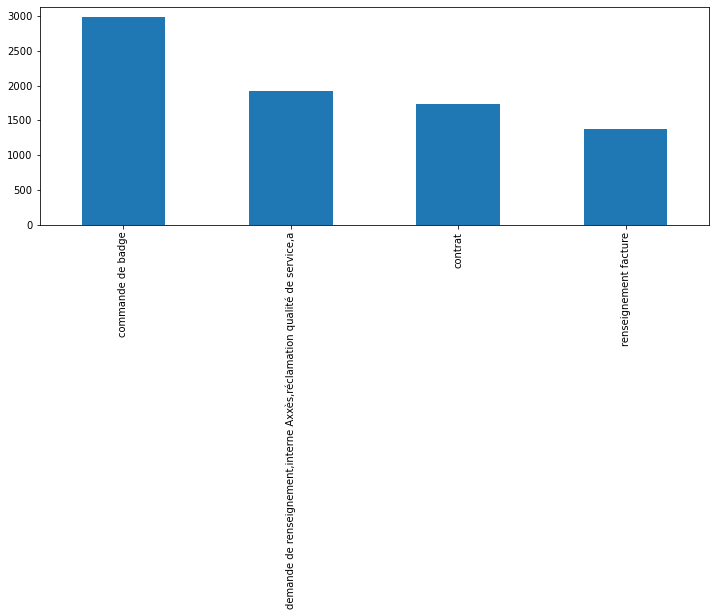

In [34]:
my_tags = msg['catégorie']
plt.figure(figsize=(12,4))
my_tags.value_counts().plot(kind='bar');

In [35]:
my_tags=my_tags.unique()

In [36]:
#msg=msg.loc[msg['occurence']!=-1]
msg.shape

(8014, 4)

In [37]:
msg.to_excel("fin1.xlsx", index = False)

In [38]:
#msg=pd.read_excel('message_cord_1001.xlsx',engine='openpyxl')
#msg=msg[1001:1640]
#msg=msg.head(500)

In [39]:
msg['text'].apply(lambda x: len(x.split(' '))).sum()

736727

In [40]:
X = msg['text']
y = msg['catégorie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 22)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6811,)
(1203,)
(6811,)
(1203,)


In [42]:
my_tags = ['contrat', 'commande de badge', 'réclamation qualité de service',
       'interne Axxès', 'renseignement facture',
       'demande de renseignement', 'remplacement badge',
       'réclamation facture', 'réclamation logistique', 'amende Belgique',
       'no message']

In [43]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

accuracy 0.5511221945137157
                                                                         precision    recall  f1-score   support

                                                      commande de badge       0.47      0.92      0.62       436
                                                                contrat       0.62      0.23      0.34       262
demande de renseignement,interne Axxès,réclamation qualité de service,a       0.82      0.37      0.51       284
                                                  renseignement facture       0.80      0.44      0.57       221

                                                               accuracy                           0.55      1203
                                                              macro avg       0.68      0.49      0.51      1203
                                                           weighted avg       0.64      0.55      0.52      1203



<AxesSubplot:>

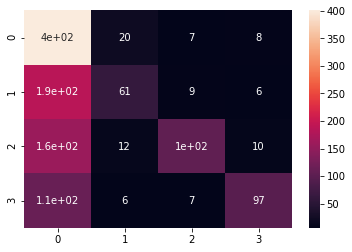

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [45]:
print(confusion_matrix(y_test, y_pred))

[[401  20   7   8]
 [186  61   9   6]
 [158  12 104  10]
 [111   6   7  97]]


In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge',class_weight="balanced", penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))


accuracy 0.7506234413965087
                                                                         precision    recall  f1-score   support

                                                      commande de badge       0.75      0.86      0.80       436
                                                                contrat       0.67      0.56      0.61       262
demande de renseignement,interne Axxès,réclamation qualité de service,a       0.77      0.64      0.70       284
                                                  renseignement facture       0.81      0.89      0.85       221

                                                               accuracy                           0.75      1203
                                                              macro avg       0.75      0.74      0.74      1203
                                                           weighted avg       0.75      0.75      0.74      1203



<AxesSubplot:>

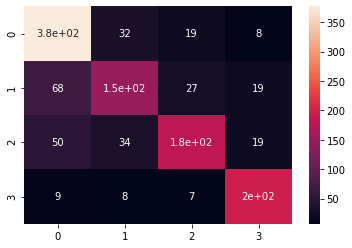

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [48]:
print(confusion_matrix(y_test, y_pred))

[[377  32  19   8]
 [ 68 148  27  19]
 [ 50  34 181  19]
 [  9   8   7 197]]


In [49]:
from sklearn.linear_model import LogisticRegression
#1e5
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=2, C=1e5,class_weight="balanced")),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

accuracy 0.7281795511221946
                                                                         precision    recall  f1-score   support

                                                      commande de badge       0.75      0.80      0.77       436
                                                                contrat       0.59      0.65      0.62       262
demande de renseignement,interne Axxès,réclamation qualité de service,a       0.77      0.62      0.68       284
                                                  renseignement facture       0.82      0.82      0.82       221

                                                               accuracy                           0.73      1203
                                                              macro avg       0.73      0.72      0.72      1203
                                                           weighted avg       0.73      0.73      0.73      1203



<AxesSubplot:>

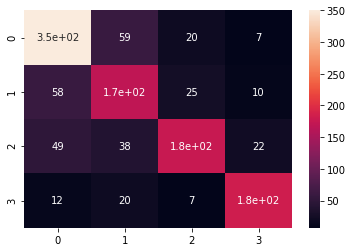

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [51]:

pred = pd.DataFrame({
                    'Messages':X_test,
                    'Prédiction':y_pred,
                    'Réel': y_test
                   })
#pred.head(30)
pred_diff=pred.loc[pred['Prédiction']!=pred['Réel']]
len(pred_diff)

327

In [52]:
pred_diff.to_excel('final_diff.xlsx',engine='openpyxl')

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=1000,n_jobs=1,class_weight= "balanced")),#
               ])
Random.fit(X_train, y_train)


y_pred = Random.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
k=2
seed=6
ONE = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                #('scaler' , MaxAbsScaler()),
                #('under', RandomOverSampler()),#sampling_strategy=ss
               # ('smote', SMOTE(random_state=seed,k_neighbors=k, sampling_strategy = 'minority')),
               ('clf', OneVsRestClassifier(LinearSVC(random_state=0))),
                #('clf', LogisticRegression(n_jobs=-1, C=1e5)),      
               ])
ONE.fit(X_train, y_train)


y_pred = ONE.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
pred = pd.DataFrame({
                    'Messages':X_test,
                    'Prédiction':y_pred,
                    'Réel': y_test
                   })
#pred.head(30)
pred_diff=pred.loc[pred['Prédiction']!=pred['Réel']]
len(pred_diff)

In [ ]:
#train_sizes=np.linspace(0.1,1,10)

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, scoring='f1_micro',axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(logreg,X_train, y_train, cv=cv, scoring=scoring,n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (sgd)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

#estimator = GaussianNB()
plot_learning_curve(sgd, title, X_train, y_train, scoring='f1_micro',axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (logreg, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(logreg, title, X_train, y_train,scoring='f1_micro', axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
#x_train = pd.get_dummies(X_train)

c_space = np.logspace(-5,8,15)
param_grid = {'C':c_space}
logreg = LogisticRegression()
logreg_cv =  GridSearchCV(logreg,param_grid,cv=5)
logreg_cv.fit(x_train,y_train)
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)
print(logreg_cv.best_estimator_)


In [ ]:
#train_sizes, train_scores, valid_scores= learning_curve(logreg ,X_train, y_train, cv=5, scoring='f1_micro', train_sizes=np.linspace(0.1, 1.0, 5))

In [ ]:
#train_scores

In [ ]:
plt.figure(figsize=(5,1))
plt.plot(train_sizes,train_scores.mean(axis=1),label='train score')
plt.plot(train_sizes,valid_scores.mean(axis=1),label='validation score')
plt.legend()

In [ ]:
import pickle

In [ ]:
#pickle.dump(logreg, open('mail.pkl', 'wb'))

In [ ]:
pred = pd.DataFrame(data=y_pred)
(pred.head(60)).astype(str)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from imblearn.pipeline import make_pipeline

In [ ]:
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
kmeans = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('kmeans', KMeans(n_clusters=4)),
               ])
kmeans.fit(X_train)

y_kmeans = kmeans.predict(X_train)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred, multi_class="ovr")

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
test=['je veux un nouveau badge','j\'ai fait un virement sepa','je veux un renseignement sur ma facture','j\'envoie la carte grise de mon vehicule'
     ,'j\'ai des impayés car la facture n\est pas arrivé','je veux savoir comment activer le badge']
all_predictions = logreg.predict(test)
pred = pd.DataFrame({
                    'Messages':test,
                    'Prédiction':all_predictions#,
                    #'Réel': y_test
                   })
pred.head(30)

In [ ]:
 #pred.to_excel("predict_reel_contrat.xlsx", index = True)